<a href="https://colab.research.google.com/github/ArthAgrawal/Brain-Tumor-Research-Paper/blob/main/Brain_Tumor_Research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset_folder_path = '/content/drive/MyDrive/Brain_Tumor_44'


In [ ]:
import os
class_counts = {}
for class_folder in os.listdir(dataset_folder_path):
    class_path = os.path.join(dataset_folder_path, class_folder)

    if os.path.isdir(class_path):
        num_images = len([f for f in os.listdir(class_path) if f.endswith(('.jpg', '.jpeg', '.png'))])
        class_counts[class_folder] = num_images

for class_name, count in class_counts.items():
    print(f"Class: {class_name}, Number of images: {count}")


Class: Glioblastoma T1, Number of images: 55
Class: _NORMAL T1, Number of images: 251
Class: Germinoma T1, Number of images: 27
Class: Meningioma T1, Number of images: 272
Class: Astrocitoma T1, Number of images: 176
Class: Granuloma T1, Number of images: 30
Class: Papiloma T1, Number of images: 66
Class: Tuberculoma T1, Number of images: 28
Class: Neurocitoma T1, Number of images: 130
Class: Carcinoma T1, Number of images: 65
Class: Schwannoma T1, Number of images: 148
Class: Meduloblastoma T1, Number of images: 23
Class: Ependimoma T1, Number of images: 45
Class: Ganglioglioma T1, Number of images: 20
Class: Oligodendroglioma T1, Number of images: 86


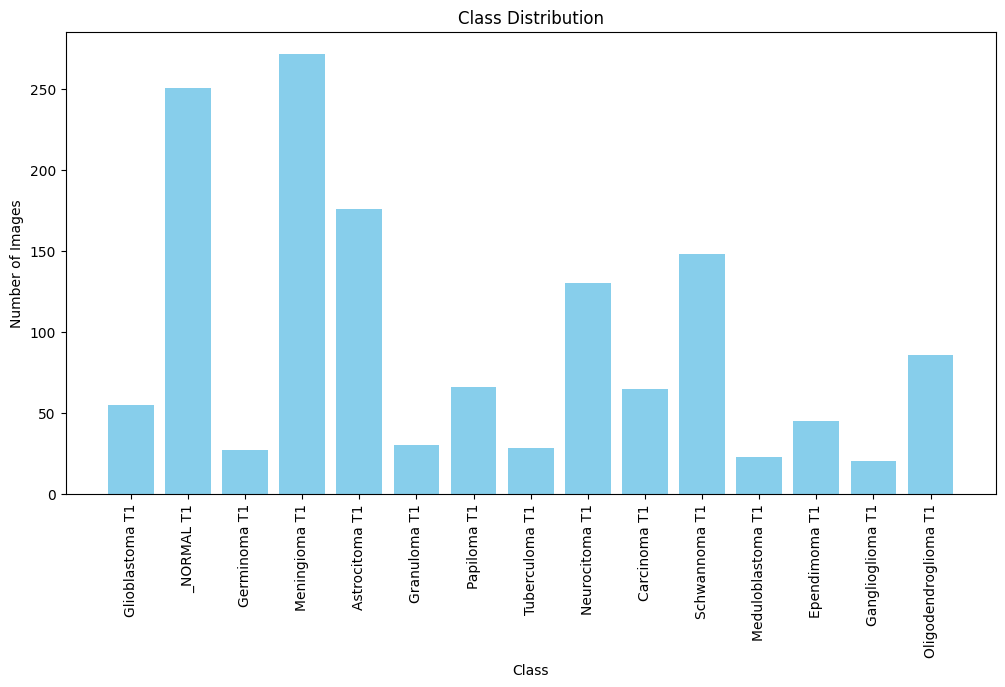

In [ ]:
import matplotlib.pyplot as plt

classes = list(class_counts.keys())
counts = list(class_counts.values())

plt.figure(figsize=(12, 6))
plt.bar(classes, counts, color='skyblue')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Class Distribution')
plt.xticks(rotation=90)
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Minority classes: ['Germinoma T1', 'Granuloma T1', 'Tuberculoma T1', 'Meduloblastoma T1', 'Ependimoma T1', 'Ganglioglioma T1']


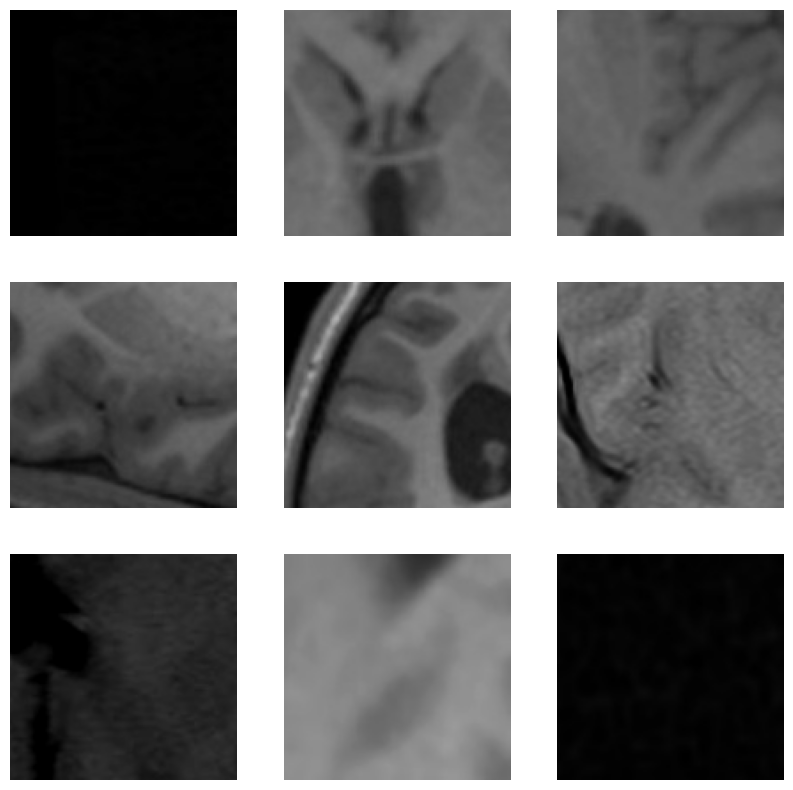

In [ ]:
import os
import cv2
import albumentations as A
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from google.colab import drive

drive.mount('/content/drive')

base_folder = '/content/drive/MyDrive/Brain_Tumor_44'
augmented_base_path = '/content/drive/MyDrive/Brain_Tumor_44_augmented'

os.makedirs(augmented_base_path, exist_ok=True)

def get_class_distribution(base_folder):
    class_counts = defaultdict(int)
    for class_folder in os.listdir(base_folder):
        class_path = os.path.join(base_folder, class_folder)
        if os.path.isdir(class_path):
            class_counts[class_folder] = len(os.listdir(class_path))
    return class_counts

class_counts = get_class_distribution(base_folder)

threshold = 50
minority_classes = [cls for cls, count in class_counts.items() if count < threshold]

print("Minority classes:", minority_classes)
augmentation_pipeline = A.Compose([
    A.RandomRotate90(),
    A.HorizontalFlip(),
    A.VerticalFlip(),
    A.RandomBrightnessContrast(),
    A.RandomSizedCrop(min_max_height=(50, 101), height=128, width=128, p=0.5),
    A.HueSaturationValue(p=0.3),
    A.RandomGamma(gamma_limit=(80, 120), p=0.5),
    A.RandomCrop(width=128, height=128),
])

def augment_images(image_folder, save_folder, augmentations, num_augmentations=5):
    os.makedirs(save_folder, exist_ok=True)

    for filename in os.listdir(image_folder):
        image_path = os.path.join(image_folder, filename)
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        for i in range(num_augmentations):
            augmented = augmentations(image=image)
            augmented_image = augmented['image']
            augmented_image = cv2.cvtColor(augmented_image, cv2.COLOR_RGB2BGR)

            save_path = os.path.join(save_folder, f"{os.path.splitext(filename)[0]}_aug_{i}.jpg")
            cv2.imwrite(save_path, augmented_image)

for class_name in minority_classes:
    class_folder = os.path.join(base_folder, class_name)
    save_folder = os.path.join(augmented_base_path, class_name)
    augment_images(class_folder, save_folder, augmentation_pipeline)

def display_images(folder_path, num_images):
    plt.figure(figsize=(10, 10))
    image_files = os.listdir(folder_path)
    sample_files = np.random.choice(image_files, num_images, replace=False)

    for i, file in enumerate(sample_files):
        image_path = os.path.join(folder_path, file)
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(image)
        plt.axis("off")
    plt.show()
if minority_classes:
    display_images(os.path.join(augmented_base_path, minority_classes[0]), num_images=9)


In [ ]:
import os

def count_images_per_class(base_folder):
    class_counts = {}

    for class_name in os.listdir(base_folder):
        class_folder = os.path.join(base_folder, class_name)
        if os.path.isdir(class_folder):
            num_images = len([f for f in os.listdir(class_folder) if os.path.isfile(os.path.join(class_folder, f))])
            class_counts[class_name] = num_images

    return class_counts

base_folder = '/content/drive/MyDrive/Brain_Tumor_44_augmented'
class_counts = count_images_per_class(base_folder)


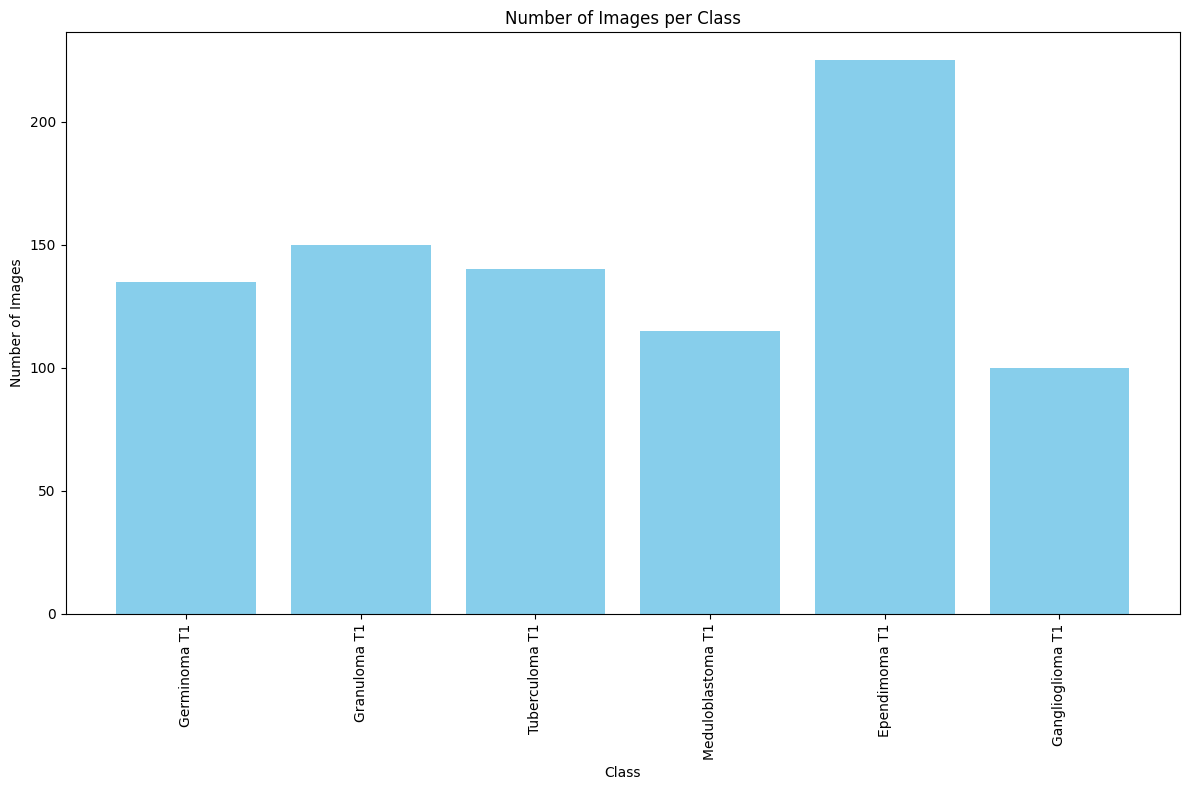

In [ ]:
import matplotlib.pyplot as plt

def plot_class_distribution(class_counts):
    classes = list(class_counts.keys())
    counts = list(class_counts.values())

    plt.figure(figsize=(12, 8))
    plt.bar(classes, counts, color='skyblue')
    plt.xlabel('Class')
    plt.ylabel('Number of Images')
    plt.title('Number of Images per Class')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

plot_class_distribution(class_counts)


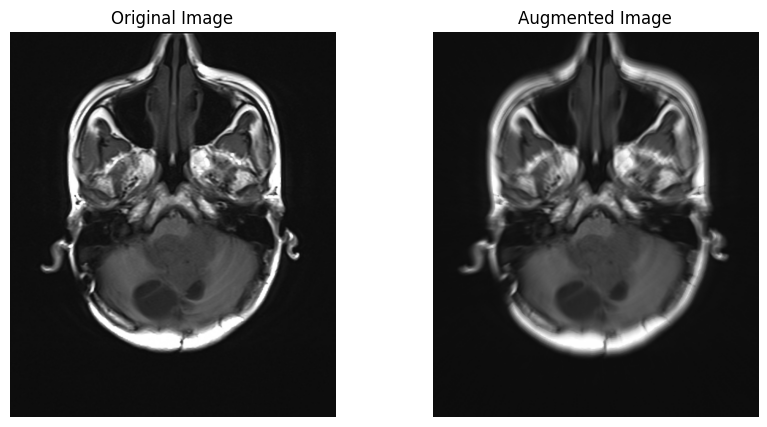

In [ ]:
import albumentations as A
import cv2
import matplotlib.pyplot as plt
import numpy as np

augmentation_pipeline = A.Compose([
    A.ZoomBlur(always_apply=False, p=1.0, max_factor=(1.0, 1.31), step_factor=(0.01, 0.03))
])


image_path = '/content/drive/MyDrive/Brain_Tumor_44/Meduloblastoma T1/926a75381c520ccf8bd4e318c89cb1118f494c7bdea2ac0e488f0145d917ced1_big_gallery.jpeg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


augmented = augmentation_pipeline(image=image)
augmented_image = augmented['image']

def display_images(original, augmented):
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(original)
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.title("Augmented Image")
    plt.imshow(augmented)
    plt.axis("off")

    plt.show()

display_images(image, augmented_image)


Total images found: 18
First few image filenames: ['b9aec8397b1f9a2c9492cf658b9dc7_big_gallery.jpeg', 'e9aef445b14e2a124fe8404f3f107a_big_gallery.jpeg', '57_big_gallery.jpeg', '6948431fe00ddd25d057487a689a63_big_gallery.jpeg', 'e0496a42b701e1ba966a456a2a261c_big_gallery.jpeg']
Selected images: ['e0496a42b701e1ba966a456a2a261c_big_gallery.jpeg', 'b9aec8397b1f9a2c9492cf658b9dc7_big_gallery.jpeg', '9e87b94dc8549b2f89a67a312a95fc_big_gallery.jpeg', '31d3878194efa57d42e86eac3cc570_big_gallery.jpeg', '67_big_gallery.jpeg']
Processing image: /content/drive/MyDrive/Brain_Tumor_44/Germinoma T1/e0496a42b701e1ba966a456a2a261c_big_gallery.jpeg
Processing image: /content/drive/MyDrive/Brain_Tumor_44/Germinoma T1/b9aec8397b1f9a2c9492cf658b9dc7_big_gallery.jpeg
Processing image: /content/drive/MyDrive/Brain_Tumor_44/Germinoma T1/9e87b94dc8549b2f89a67a312a95fc_big_gallery.jpeg
Processing image: /content/drive/MyDrive/Brain_Tumor_44/Germinoma T1/31d3878194efa57d42e86eac3cc570_big_gallery.jpeg
Processin

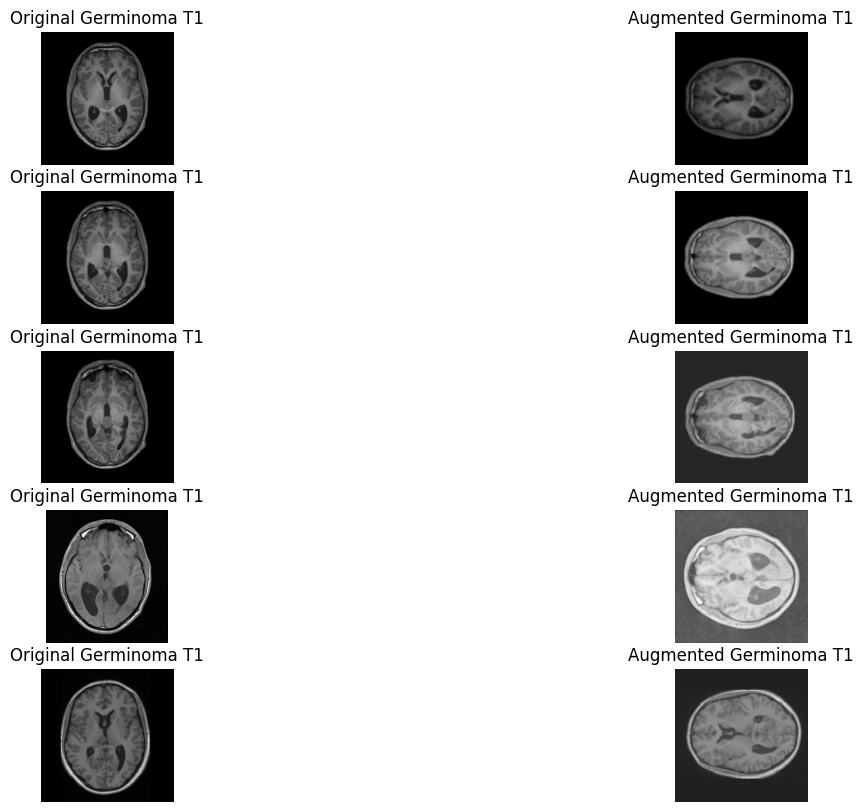

In [ ]:
import albumentations as A
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import random

def create_augmentation_pipeline():
    return A.Compose([
        A.CLAHE(clip_limit=(1, 10), tile_grid_size=(8, 8), p=0.3),
        # A.ChannelDropout(channel_drop_range=(1,2), fill_value=150, p=0.2),
        A.Defocus(radius=(3.10), p=0.4),
        A.Downscale(p=0.5, scale_min=0.5,	scale_max=0.9),
        A.ElasticTransform(p=0.5, alpha=9.00, sigma=180, interpolation=0, border_mode=0),
        A.GaussianBlur(p=0.4, blur_limit=(3,5), sigma_limit=(0.5,1.5)),
        # A.GridDistortion(p=0.4, num_steps=10, distort_limit=(-0.3,0.3), border_mode=0),
        A.HorizontalFlip(p=0.3),
        # A.VerticalFlip(p=0.3),
        A.HueSaturationValue(p=0.3, hue_shift_limit=(-20, 61), sat_shift_limit=(-30, 30), val_shift_limit=(-20, 20)),
        # A.ImageCompression(p=0.2, quality_lower=50, quality_upper=10, compression_type=1),
        # A.InvertImg(p=0.2),
        # A.OpticalDistortion(p=0.2, distort_limit=(-0.3,0.3), shift_limit=(-0.2,0.2), interpolation=0, border_mode=0, value=(0, 0, 0), mask_value=None),
        # A.Perspective(p=0.3, scale=(0.05, 0.2), keep_size=0, pad_mode=0, pad_val=(0, 0, 0), mask_pad_val=0, fit_output=0, interpolation=0),
        # A.PixelDropout(p=0.2, dropout_prob=0.01, per_channel=0, drop_value=0.0, mask_drop_value=None),
        A.RandomBrightnessContrast(p=0.3, brightness_limit=(-0.15,0.15), contrast_limit=(-0.2,0.2), brightness_by_max=True),
        # A.RandomCropFromBorders(p=0.2, crop_left=0.1, crop_right=0.1, crop_top=0.15, crop_bottom=0.25),
        A.RandomGamma(p=0.4, gamma_limit=(32, 73)),
        A.Transpose(p=0.5),
        A.ZoomBlur(p=0.1, max_factor=(1.0, 1.1), step_factor=(0.01, 0.03))
    ])


dataset_path = '/content/drive/MyDrive/Brain_Tumor_44/Germinoma T1/'
class_label = 'Germinoma T1'


image_files = [f for f in os.listdir(dataset_path) if f.endswith('.jpeg','.jpg')]


print(f"Total images found: {len(image_files)}")
print(f"First few image filenames: {image_files[:5]}")


num_images_to_sample = min(len(image_files), 5)


selected_images = random.sample(image_files, num_images_to_sample)


print(f"Selected images: {selected_images}")

def process_image(image_path, augmentation_pipeline):
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError(f"Image at {image_path} could not be loaded.")
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (256, 256))
    augmented = augmentation_pipeline(image=image)
    return augmented['image']

augmentation_pipeline = create_augmentation_pipeline()


def display_augmented_images(images, class_label):
    plt.figure(figsize=(15, 10))

    for idx, img_path in enumerate(images):
        full_image_path = os.path.join(dataset_path, img_path)
        print(f"Processing image: {full_image_path}")
        augmented_image = process_image(full_image_path, augmentation_pipeline)

        plt.subplot(5, 2, 2 * idx + 1)
        plt.title(f"Original {class_label}")
        original_image = cv2.imread(full_image_path)
        original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
        plt.imshow(original_image)
        plt.axis("off")

        plt.subplot(5, 2, 2 * idx + 2)
        plt.title(f"Augmented {class_label}")
        plt.imshow(augmented_image)
        plt.axis("off")

    plt.show()

display_augmented_images(selected_images, class_label)

In [ ]:
import albumentations as A
import cv2
import numpy as np
import os

def create_augmentation_pipeline():
    return A.Compose([
        A.CLAHE(clip_limit=(1, 10), tile_grid_size=(8, 8), p=0.3),
        A.Defocus(radius=(3.10), p=0.4),
        A.Downscale(p=0.5, scale_min=0.5, scale_max=0.9),
        A.ElasticTransform(p=0.5, alpha=9.00, sigma=180, interpolation=0, border_mode=0),
        A.GaussianBlur(p=0.4, blur_limit=(3, 5), sigma_limit=(0.5, 1.5)),
        A.HorizontalFlip(p=0.3),
        A.HueSaturationValue(p=0.3, hue_shift_limit=(-20, 61), sat_shift_limit=(-30, 30), val_shift_limit=(-20, 20)),
        A.RandomBrightnessContrast(p=0.3, brightness_limit=(-0.15, 0.15), contrast_limit=(-0.2, 0.2), brightness_by_max=True),
        A.RandomGamma(p=0.4, gamma_limit=(32, 73)),
        A.Transpose(p=0.5),
        A.ZoomBlur(p=0.1, max_factor=(1.0, 1.1), step_factor=(0.01, 0.03))
    ])

def calculate_num_augmented_images(num_images, min_size=100, intermediate_size=150, target_size=200):
    if num_images < min_size:
        return target_size // num_images
    elif num_images < intermediate_size:
        return intermediate_size // num_images
    elif num_images < target_size:
        return (target_size - num_images) // num_images
    return 0

def augment_images_for_class(image_paths, output_dir, num_augmented_images):
    augmentation_pipeline = create_augmentation_pipeline()

    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for image_path in image_paths:
        image = cv2.imread(image_path)
        if image is None:
            print(f"Warning: Image at {image_path} could not be loaded.")
            continue
        base_filename = os.path.splitext(os.path.basename(image_path))[0]
        output_path = os.path.join(output_dir, f"{base_filename}_orig.jpeg")
        cv2.imwrite(output_path, image)

    for image_path in image_paths:
        image = cv2.imread(image_path)
        if image is None:
            print(f"Warning: Image at {image_path} could not be loaded.")
            continue
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (256, 256))

        for i in range(num_augmented_images):
            augmented = augmentation_pipeline(image=image)
            augmented_image = augmented['image']
            base_filename = os.path.splitext(os.path.basename(image_path))[0]
            output_path = os.path.join(output_dir, f"{base_filename}_aug_{i+1}.jpeg")
            cv2.imwrite(output_path, cv2.cvtColor(augmented_image, cv2.COLOR_RGB2BGR))

def process_dataset(dataset_path, output_path, min_size=150, intermediate_size=200, target_size=300):
    if not os.path.exists(output_path):
        os.makedirs(output_path)

    class_dirs = [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))]

    for class_dir in class_dirs:
        class_path = os.path.join(dataset_path, class_dir)
        image_paths = [os.path.join(class_path, f) for f in os.listdir(class_path) if f.lower().endswith(('.jpeg', '.jpg'))]
        num_images = len(image_paths)
        num_augmented_images = calculate_num_augmented_images(num_images, min_size, intermediate_size, target_size)

        if num_augmented_images > 0:
            output_dir = os.path.join(output_path, f"{class_dir}_augmented")
            augment_images_for_class(image_paths, output_dir, num_augmented_images)
            print(f"Processed class '{class_dir}': {num_images} images, augmented to {num_images + num_augmented_images * len(image_paths)}")

dataset_path = '/content/drive/MyDrive/Brain_Tumor_44'
output_path = '/content/drive/MyDrive/Brain_Tumor_Albumented'

process_dataset(dataset_path, output_path)


Processed class 'Carcinoma T1': 66 images, augmented to 330
Processed class 'Oligodendroglioma T1': 86 images, augmented to 344
Processed class 'Tuberculoma T1': 28 images, augmented to 308
Processed class 'Meduloblastoma T1': 23 images, augmented to 322
Processed class 'Papiloma T1': 66 images, augmented to 330
Processed class 'Ependimoma T1': 45 images, augmented to 315
Processed class 'Neurocitoma T1': 130 images, augmented to 390
Processed class 'Granuloma T1': 30 images, augmented to 330
Processed class 'Ganglioglioma T1': 20 images, augmented to 320
Processed class 'Schwannoma T1': 148 images, augmented to 444
Processed class 'Glioblastoma T1': 55 images, augmented to 330
Processed class 'Germinoma T1': 27 images, augmented to 324
Processed class 'Astrocitoma T1': 176 images, augmented to 352


In [ ]:
import shutil
import os

source_path = '//content/drive/MyDrive/Brain_Tumor_44/Meningioma T1'
destination_path = '/content/drive/MyDrive/Brain_Tumor_Albumented/Meningioma T1_augmented'

if not os.path.exists(destination_path):
    shutil.copytree(source_path, destination_path)
    print(f"Copied 'Meningioma' folder from {source_path} to {destination_path}")
else:
    print(f"'Meningioma' folder already exists in {destination_path}")


Copied 'Meningioma' folder from //content/drive/MyDrive/Brain_Tumor_44/Meningioma T1 to /content/drive/MyDrive/Brain_Tumor_Albumented/Meningioma T1_augmented


Class: Neurocitoma T1_augmented, Number of images: 390
Class: Granuloma T1_augmented, Number of images: 330
Class: Ganglioglioma T1_augmented, Number of images: 320
Class: Schwannoma T1_augmented, Number of images: 444
Class: _NORMAL T1_augmented, Number of images: 251
Class: Carcinoma T1_augmented, Number of images: 330
Class: Oligodendroglioma T1_augmented, Number of images: 344
Class: Tuberculoma T1_augmented, Number of images: 308
Class: Meduloblastoma T1_augmented, Number of images: 322
Class: Papiloma T1_augmented, Number of images: 330
Class: Ependimoma T1_augmented, Number of images: 315
Class: Glioblastoma T1_augmented, Number of images: 330
Class: Germinoma T1_augmented, Number of images: 324
Class: Astrocitoma T1_augmented, Number of images: 322
Class: Meningioma T1_augmented, Number of images: 272


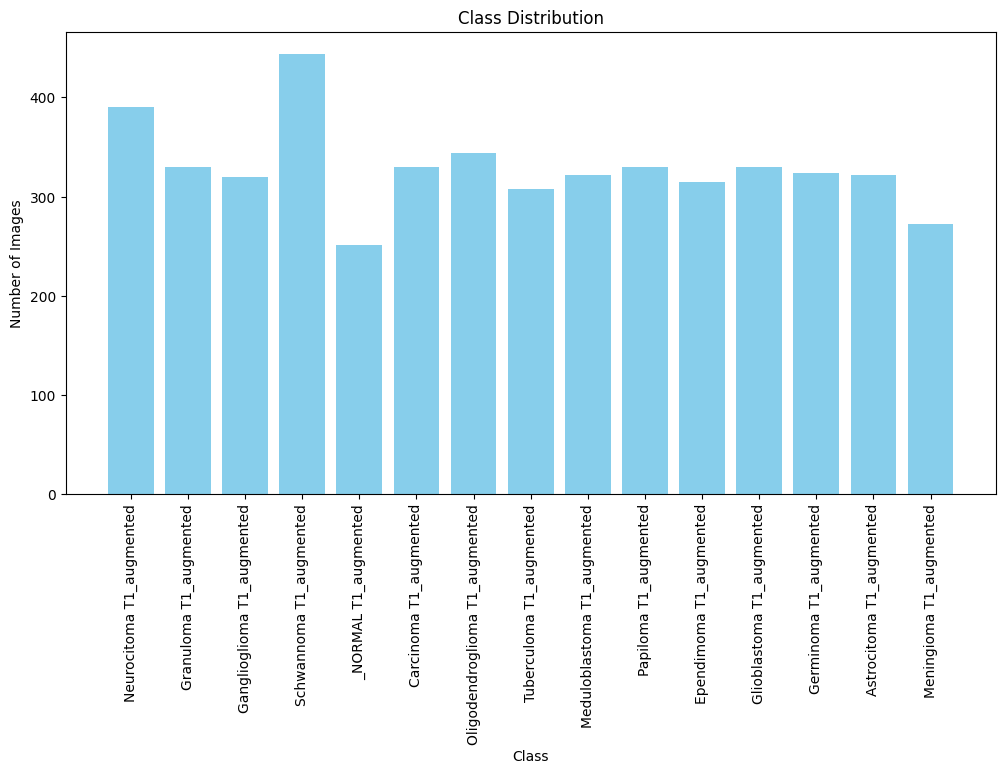

In [ ]:
dataset_folder_path = '/content/drive/MyDrive/Brain_Tumor_Albumented'
import os
class_counts = {}
for class_folder in os.listdir(dataset_folder_path):
    class_path = os.path.join(dataset_folder_path, class_folder)

    if os.path.isdir(class_path):
        num_images = len([f for f in os.listdir(class_path) if f.endswith(('.jpg', '.jpeg', '.png'))])
        class_counts[class_folder] = num_images

for class_name, count in class_counts.items():
    print(f"Class: {class_name}, Number of images: {count}")

import matplotlib.pyplot as plt

classes = list(class_counts.keys())
counts = list(class_counts.values())

plt.figure(figsize=(12, 6))
plt.bar(classes, counts, color='skyblue')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Class Distribution')
plt.xticks(rotation=90)
plt.show()



In [20]:
!pip install autoaugment


ERROR: Could not find a version that satisfies the requirement autoaugment (from versions: none)
ERROR: No matching distribution found for autoaugment


Original Images:


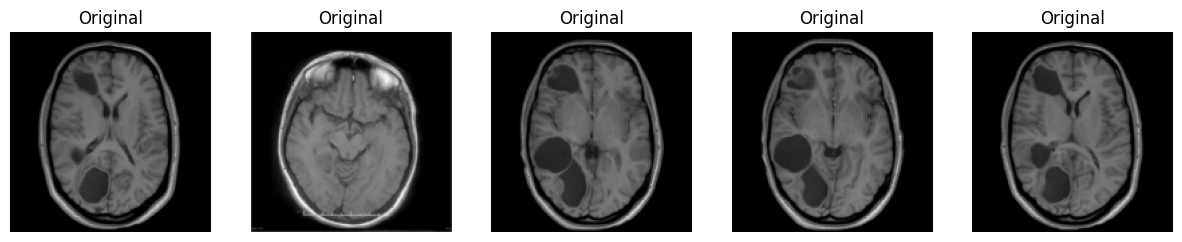

Auto-Augmented Images:


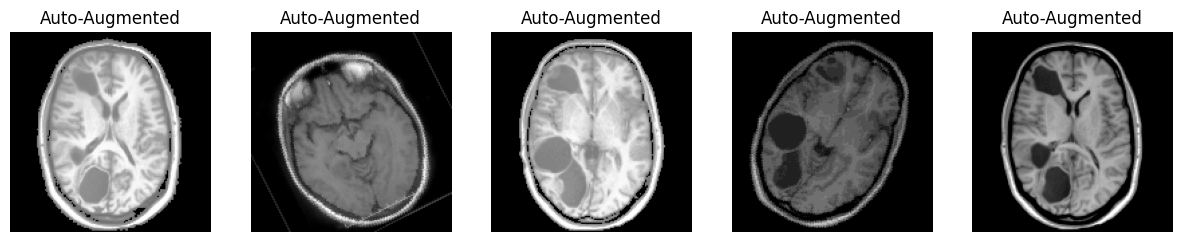

In [27]:
from PIL import Image
import os
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

class CustomDataset(Dataset):
    def __init__(self, image_dir, transform=None):
        self.image_dir = image_dir
        self.transform = transform
        self.image_filenames = [f for f in os.listdir(image_dir) if f.endswith('.jpg')]

    def __len__(self):
        return len(self.image_filenames)

    def __getitem__(self, idx):
        img_name = os.path.join(self.image_dir, self.image_filenames[idx])
        image = Image.open(img_name).convert('RGB')
        if self.transform:
            image = self.transform(image)
        return image

autoaugment_policy = transforms.AutoAugment(transforms.AutoAugmentPolicy.IMAGENET)

transform = transforms.Compose([
    transforms.Resize((150, 150)),
    transforms.ToTensor(),
])


def show_images(images, titles=None, cols=5):
    rows = len(images) // cols + (1 if len(images) % cols > 0 else 0)
    plt.figure(figsize=(15, rows * 3))
    for i, img in enumerate(images):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(img)
        if titles:
            plt.title(titles[i])
        plt.axis('off')
    plt.show()


image_dir = '/content/drive/MyDrive/Brain_Tumor_44/Ganglioglioma T1'
dataset = CustomDataset(image_dir=image_dir, transform=transform)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)


original_images = next(iter(dataloader))


autoaugment_transform = transforms.Compose([
    autoaugment_policy,
    transforms.Resize((150, 150)),
    transforms.ToTensor(),
])


augmented_images = [autoaugment_transform(transforms.ToPILImage()(img)) for img in original_images]


original_images_pil = [transforms.ToPILImage()(img) for img in original_images]
augmented_images_pil = [transforms.ToPILImage()(img) for img in augmented_images]


print("Original Images:")
show_images(original_images_pil[:5], titles=['Original'] * 5)

print("Auto-Augmented Images:")
show_images(augmented_images_pil[:5], titles=['Auto-Augmented'] * 5)


In [34]:
import os
from PIL import Image
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from tqdm import tqdm


class CustomDataset(Dataset):
    def __init__(self, image_dir, transform=None):
        self.image_dir = image_dir
        self.transform = transform
        self.image_filenames = [f for f in os.listdir(image_dir) if f.lower().endswith(('.jpeg', '.jpg'))]

    def __len__(self):
        return len(self.image_filenames)

    def __getitem__(self, idx):
        img_name = os.path.join(self.image_dir, self.image_filenames[idx])
        image = Image.open(img_name).convert('RGB')
        if self.transform:
            image = self.transform(image)
        return image, img_name


autoaugment_policy = transforms.AutoAugment(transforms.AutoAugmentPolicy.IMAGENET)


transform = transforms.Compose([
    transforms.Resize((150, 150)),
    transforms.ToTensor(),
])


autoaugment_transform = transforms.Compose([
    transforms.Resize((150, 150)),
    autoaugment_policy,
])


def show_images(images, titles=None, cols=5):
    rows = len(images) // cols + (1 if len(images) % cols > 0 else 0)
    plt.figure(figsize=(15, rows * 3))
    for i, img in enumerate(images):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(img.permute(1, 2, 0))
        if titles:
            plt.title(titles[i])
        plt.axis('off')
    plt.show()


def save_augmented_images(image_paths, output_dir, num_augmented_images):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for image_path in tqdm(image_paths, desc="Processing images"):
        original_image = Image.open(image_path).convert('RGB')
        base_filename = os.path.splitext(os.path.basename(image_path))[0]
        original_output_path = os.path.join(output_dir, f"{base_filename}_orig.jpeg")
        original_image.save(original_output_path)

        image = transform(original_image)

        for i in range(num_augmented_images):
            augmented_image = autoaugment_transform(transforms.ToPILImage()(image))
            augmented_output_path = os.path.join(output_dir, f"{base_filename}_aug_{i+1}.jpeg")
            augmented_image.save(augmented_output_path)

def process_dataset(dataset_path, output_path, min_size=150, intermediate_size=180, target_size=200):
    if not os.path.exists(output_path):
        os.makedirs(output_path)

    class_dirs = [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))]

    for class_dir in class_dirs:
        class_path = os.path.join(dataset_path, class_dir)
        image_paths = [os.path.join(class_path, f) for f in os.listdir(class_path) if f.lower().endswith(('.jpeg', '.jpg'))]
        num_images = len(image_paths)
        num_augmented_images = calculate_num_augmented_images(num_images, min_size, intermediate_size, target_size)

        if num_augmented_images > 0:
            output_dir = os.path.join(output_path, f"{class_dir}_augmented")
            save_augmented_images(image_paths, output_dir, num_augmented_images)
            print(f"Processed class '{class_dir}': {num_images} images, augmented to {num_images + num_augmented_images * len(image_paths)}")

def calculate_num_augmented_images(num_images, min_size=100, intermediate_size=150, target_size=200):
    if num_images < min_size:
        return target_size // num_images
    elif num_images < intermediate_size:
        return intermediate_size // num_images
    elif num_images < target_size:
        return (target_size - num_images) // num_images
    return 0

dataset_path = '/content/drive/MyDrive/Brain_Tumor_44'
output_path = '/content/drive/MyDrive/Brain_Tumor_AutoAugmented'

process_dataset(dataset_path, output_path)


Processing images: 100%|██████████| 66/66 [00:03<00:00, 17.82it/s]


Processed class 'Carcinoma T1': 66 images, augmented to 264


Processing images: 100%|██████████| 86/86 [00:03<00:00, 22.38it/s]


Processed class 'Oligodendroglioma T1': 86 images, augmented to 258


Processing images: 100%|██████████| 28/28 [00:03<00:00,  8.07it/s]


Processed class 'Tuberculoma T1': 28 images, augmented to 224


Processing images: 100%|██████████| 23/23 [00:03<00:00,  7.53it/s]


Processed class 'Meduloblastoma T1': 23 images, augmented to 207


Processing images: 100%|██████████| 66/66 [00:03<00:00, 18.04it/s]


Processed class 'Papiloma T1': 66 images, augmented to 264


Processing images: 100%|██████████| 45/45 [00:03<00:00, 13.98it/s]


Processed class 'Ependimoma T1': 45 images, augmented to 225


Processing images: 100%|██████████| 130/130 [00:05<00:00, 25.44it/s]


Processed class 'Neurocitoma T1': 130 images, augmented to 260


Processing images: 100%|██████████| 30/30 [00:03<00:00,  9.78it/s]


Processed class 'Granuloma T1': 30 images, augmented to 210


Processing images: 100%|██████████| 20/20 [00:02<00:00,  6.90it/s]


Processed class 'Ganglioglioma T1': 20 images, augmented to 220


Processing images: 100%|██████████| 148/148 [00:05<00:00, 28.01it/s]


Processed class 'Schwannoma T1': 148 images, augmented to 296


Processing images: 100%|██████████| 55/55 [00:03<00:00, 13.96it/s]


Processed class 'Glioblastoma T1': 55 images, augmented to 220


Processing images: 100%|██████████| 27/27 [00:02<00:00,  9.10it/s]


Processed class 'Germinoma T1': 27 images, augmented to 216


Processing images: 100%|██████████| 176/176 [00:06<00:00, 29.24it/s]

Processed class 'Astrocitoma T1': 176 images, augmented to 352


In [32]:
import shutil
import os

source_path = '//content/drive/MyDrive/Brain_Tumor_44/Meningioma T1'
destination_path = '/content/drive/MyDrive/Brain_Tumor_AutoAugmented/Meningioma T1_augmented'

if not os.path.exists(destination_path):
    shutil.copytree(source_path, destination_path)
    print(f"Copied 'Meningioma' folder from {source_path} to {destination_path}")
else:
    print(f"'Meningioma' folder already exists in {destination_path}")


Copied 'Meningioma' folder from //content/drive/MyDrive/Brain_Tumor_44/Meningioma T1 to /content/drive/MyDrive/Brain_Tumor_AutoAugmented/Meningioma T1_augmented


In [33]:
import shutil
import os

source_path = '//content/drive/MyDrive/Brain_Tumor_44/_NORMAL T1'
destination_path = '/content/drive/MyDrive/Brain_Tumor_AutoAugmented/NORMAL T1_augmented'


Copied 'Meningioma' folder from //content/drive/MyDrive/Brain_Tumor_44/_NORMAL T1 to /content/drive/MyDrive/Brain_Tumor_AutoAugmented/NORMAL T1_augmented


Class: Carcinoma T1_augmented, Number of images: 330
Class: Oligodendroglioma T1_augmented, Number of images: 288
Class: Tuberculoma T1_augmented, Number of images: 224
Class: Meduloblastoma T1_augmented, Number of images: 207
Class: Papiloma T1_augmented, Number of images: 264
Class: Ependimoma T1_augmented, Number of images: 225
Class: Neurocitoma T1_augmented, Number of images: 260
Class: Granuloma T1_augmented, Number of images: 210
Class: Ganglioglioma T1_augmented, Number of images: 220
Class: Schwannoma T1_augmented, Number of images: 296
Class: Glioblastoma T1_augmented, Number of images: 220
Class: Germinoma T1_augmented, Number of images: 216
Class: Astrocitoma T1_augmented, Number of images: 322
Class: Meningioma T1_augmented, Number of images: 272
Class: NORMAL T1_augmented, Number of images: 251


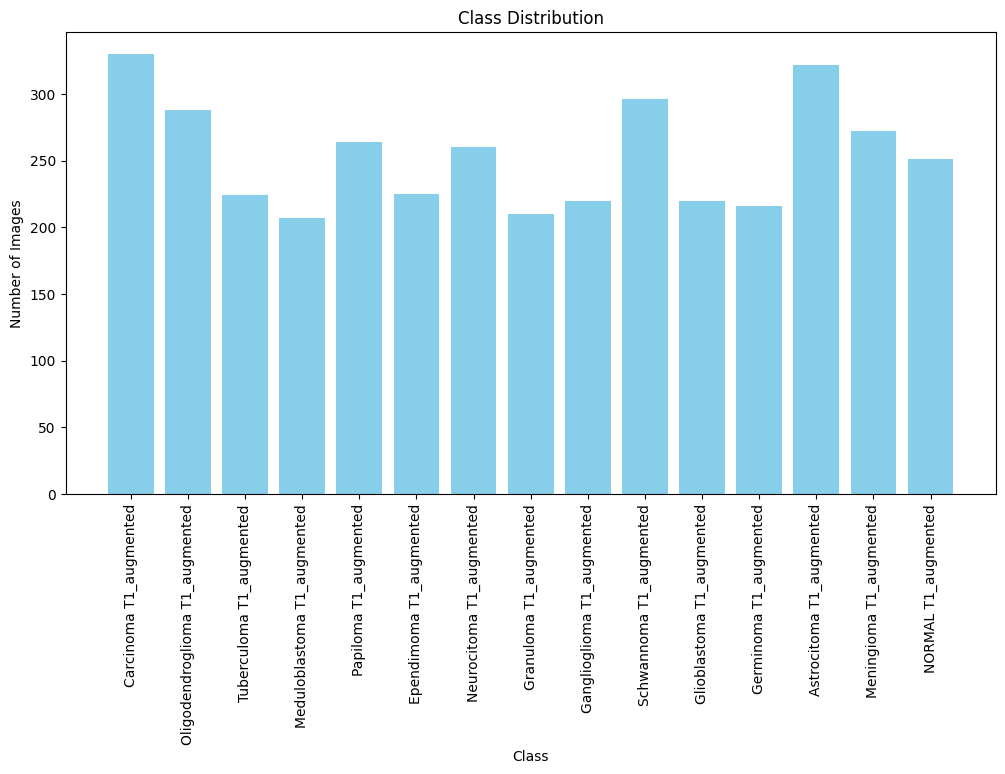

In [35]:
dataset_folder_path = '/content/drive/MyDrive/Brain_Tumor_AutoAugmented'
import os
class_counts = {}
for class_folder in os.listdir(dataset_folder_path):
    class_path = os.path.join(dataset_folder_path, class_folder)

    if os.path.isdir(class_path):
        num_images = len([f for f in os.listdir(class_path) if f.endswith(('.jpg', '.jpeg', '.png'))])
        class_counts[class_folder] = num_images

for class_name, count in class_counts.items():
    print(f"Class: {class_name}, Number of images: {count}")

import matplotlib.pyplot as plt

classes = list(class_counts.keys())
counts = list(class_counts.values())

plt.figure(figsize=(12, 6))
plt.bar(classes, counts, color='skyblue')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Class Distribution')
plt.xticks(rotation=90)
plt.show()



In [ ]:
!pip uninstall autoalbument -y
!pip install autoalbument


In [11]:
pip install albumentations albumentations-pytorch


ERROR: Could not find a version that satisfies the requirement albumentations-pytorch (from versions: none)
ERROR: No matching distribution found for albumentations-pytorch


In [14]:
import os
from PIL import Image
import torch
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
from tqdm import tqdm  # For progress tracking
import autoalbument as aab

# Define CustomDataset
class CustomDataset(Dataset):
    def __init__(self, image_dir, transform=None):
        self.image_dir = image_dir
        self.transform = transform
        self.image_filenames = [f for f in os.listdir(image_dir) if f.lower().endswith(('.jpeg', '.jpg'))]

    def __len__(self):
        return len(self.image_filenames)

    def __getitem__(self, idx):
        img_name = os.path.join(self.image_dir, self.image_filenames[idx])
        image = Image.open(img_name).convert('RGB')
        if self.transform:
            image = self.transform(image)
        return image, img_name

# Load Autoalbument policy
autoaugment_policy = aab.AutoAlbumentations()  # Use default AutoAlbumentations policy

# Define transformations including AutoAlbumentations
transform = aab.Compose([
    aab.Resize(150, 150),
    aab.ToTensor(),
])

# Define AutoAlbumentations transformation for visualization
autoaugment_transform = aab.Compose([
    aab.Resize(150, 150),
    autoaugment_policy,
])

# Define a function to display images
def show_images(images, titles=None, cols=5):
    rows = len(images) // cols + (1 if len(images) % cols > 0 else 0)
    plt.figure(figsize=(15, rows * 3))
    for i, img in enumerate(images):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(img.permute(1, 2, 0))  # Convert tensor to HWC format
        if titles:
            plt.title(titles[i])
        plt.axis('off')
    plt.show()

# Define a function to save augmented images
def save_augmented_images(image_paths, output_dir, num_augmented_images):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for image_path in tqdm(image_paths, desc="Processing images"):
        # Save the original image
        original_image = Image.open(image_path).convert('RGB')
        base_filename = os.path.splitext(os.path.basename(image_path))[0]
        original_output_path = os.path.join(output_dir, f"{base_filename}_orig.jpeg")
        original_image.save(original_output_path)

        # Apply the initial transformations
        image = transform(original_image)  # Resize, to tensor

        for i in range(num_augmented_images):
            augmented_image = autoaugment_transform(transforms.ToPILImage()(image))
            augmented_output_path = os.path.join(output_dir, f"{base_filename}_aug_{i+1}.jpeg")
            augmented_image.save(augmented_output_path)

# Process dataset and save original + augmented images
def process_dataset(dataset_path, output_path, min_size=150, intermediate_size=180, target_size=200):
    if not os.path.exists(output_path):
        os.makedirs(output_path)

    class_dirs = [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))]

    for class_dir in class_dirs:
        class_path = os.path.join(dataset_path, class_dir)
        image_paths = [os.path.join(class_path, f) for f in os.listdir(class_path) if f.lower().endswith(('.jpeg', '.jpg'))]
        num_images = len(image_paths)
        num_augmented_images = calculate_num_augmented_images(num_images, min_size, intermediate_size, target_size)

        if num_augmented_images > 0:
            output_dir = os.path.join(output_path, f"{class_dir}_augmented")
            save_augmented_images(image_paths, output_dir, num_augmented_images)
            print(f"Processed class '{class_dir}': {num_images} images, augmented to {num_images + num_augmented_images * len(image_paths)}")

# Calculate the number of augmented images
def calculate_num_augmented_images(num_images, min_size=100, intermediate_size=150, target_size=200):
    if num_images < min_size:
        return target_size // num_images
    elif num_images < intermediate_size:
        return intermediate_size // num_images
    elif num_images < target_size:
        return (target_size - num_images) // num_images
    return 0

dataset_path = '/content/drive/MyDrive/Brain_Tumor_44'
output_path = '/content/drive/MyDrive/Brain_Tumor_AutoAugmented'

process_dataset(dataset_path, output_path)


AttributeError: module 'autoalbument' has no attribute 'AutoAlbumentations'